# Alejandro Rubio Martíenz

Vamos a empezar incluyendo todos los módulos necesarios:

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from time import perf_counter as now

Ahora vamos a definir los datos que nos da el enunciado:

In [4]:
t, x, z = sp.symbols('t, x, z')
h = sp.symbols('h')
y0 = sp.symbols('y_0')

def f(t,z):
    return (t-z)/2

a,b = 0,1
ya=1

Ahora vamos a resolver la ecuación simbólicamente para poder comparar con las aproximaciones que hagamos

In [7]:
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))
sp.Eq(edo,0)
edo_sol = sp.dsolve(edo)
ics = {y(0): y0}
edo_sol.rhs.subs(t, 0),edo_sol.lhs.subs(t, 0).subs(ics)
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))
CI_sol = sp.solve(CI_eq) 
edo_sol.subs(CI_sol[0]) 

Eq(y(t), t + (y_0 + 2)*exp(-t/2) - 2)

Pero lo que nos interesa es obtener la segunda expresión y sustituyendo el y0

In [9]:
sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
sol_exacta

t - 2 + 3*exp(-t/2)

Vamos a definir esta última como una función numérica para simplificar el representarla posterioremente

In [14]:
def fsol(t):
    return t-2+3*np.exp(-t/2)

Vamos ya con los métodos. Empezamos por el método de Euler mejorado:

In [19]:
def eulerMejorado(F,x0,y00,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y00]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+h/2,Y[n]+h/2*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Ahora Euler modificado:

In [20]:
def eulerModificado(F,x0,y00,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y00]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h/2*(F(X[n],Y[n])+F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Vamos a ejecutar cada método con 10 iteraciones ($h$=0.1)

In [21]:
N=10
x1,y1 = eulerMejorado(f,a,ya,b,N)
x2,y2 = eulerModificado(f,a,ya,b,N)

Vamos a comparar las aproximaciones obtenidas:

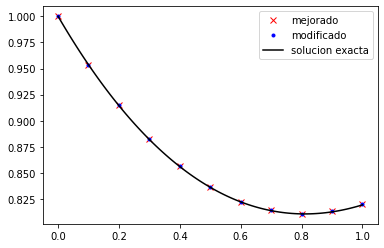

In [48]:
plt.plot(x1,y1, 'x', color = "red", label = "mejorado")
plt.plot(x2,y2, '.', color = "blue", label = "modificado")
xx = np.linspace(a,b,100)
yy = [fsol(i) for i in xx]
plt.plot(xx,yy,color="black", label = "solucion exacta")
plt.legend()

Podemos ver como los valores obtenidos son prácticamente idénticos a la solución original. Vamos a medir este error mejor, pero usando también Runge-Kutta con $p$=2 con $\alpha = \frac{3}{4}$ y $\beta = \frac{2}{3}$  (de los apuntes) (aunque podríamos cambiarlos)

In [27]:
def rk2(F,a,b,x0,N,alpha=2/3,beta=3/4):
    import numpy as np

    h = (b-a)/float(N)

    tn =[]
    xn = []
    tn.append(a)
    xn.append(x0)

    for i in range(1,N+1):
        tn.append(a+i*h)
        xn.append(0)

    for i in range(N):
        K1 = F(tn[i],xn[i])
        K2 = F(tn[i]+beta*h, xn[i]+h*beta*K1)

        xn[i+1] = xn[i] + h*((1-alpha)*K1 + alpha*K2)

    return np.array(tn), np.array(xn)

In [28]:
x3,y3 = rk2(f,a,b,ya,N)

Ahora sí vamos a representar los errores de los tres métodos

In [41]:
errorMejorado = [np.abs(fsol(x1[i])-y1[i]) for i in range(N+1)]
errorModificado = [np.abs(fsol(x2[i])-y2[i]) for i in range(N+1)]
errorRK = [np.abs(fsol(x3[i])-y3[i]) for i in range(N+1)]

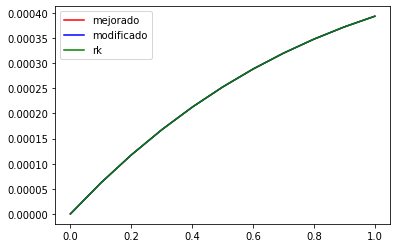

In [46]:
plt.plot(x1,errorMejorado,color="red",label="mejorado")
plt.plot(x2,errorModificado,color="blue", label="modificado")
plt.plot(x3,errorRK,color="green", label="rk")
plt.legend()

A simple vista es imposible ver cual es el mejor de todos así que vamos a verlo numéricamente:

In [47]:
print("Errores del método mejorado:\n", errorMejorado)
print("Errores del método modificado:\n", errorModificado)
print("Error del método de rk:\n", errorRK)

Errores del método mejorado:
 [0.0, 6.172649785807227e-05, 0.0001174333921212245, 0.00016756095920145153, 0.0002125208515036947, 0.00025269784206904955, 0.0002884514671359639, 0.00032011757242511596, 0.00034800976863036404, 0.0003724208012951813, 0.00039362383996743855]
Errores del método modificado:
 [0.0, 6.172649785807227e-05, 0.0001174333921212245, 0.00016756095920145153, 0.0002125208515036947, 0.00025269784206904955, 0.0002884514671359639, 0.00032011757242500494, 0.000348009768630253, 0.00037242080129507027, 0.0003936238399673275]
Error del método de rk:
 [0.0, 6.172649785807227e-05, 0.0001174333921212245, 0.00016756095920145153, 0.0002125208515036947, 0.00025269784206904955, 0.0002884514671359639, 0.00032011757242500494, 0.000348009768630253, 0.00037242080129507027, 0.0003936238399673275]


Podemos observar como euler modifcado y rk tienen los mismos errores